<a href="https://colab.research.google.com/github/SunilKumarSingh84/Keras/blob/main/TF_Keras_CIFAR_10_CNN_IMPROVED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, GlobalMaxPooling2D, Dropout, BatchNormalization

170508288/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)
lables= 10


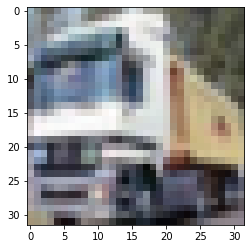

In [3]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
plt.imshow(x_train[1])

y_train, y_test = y_train.flatten(), y_test.flatten()  # Need y to be a vector of (50000,) and not (50000,1)
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

N, H, W, C = x_train.shape
K = len(set(y_train))
print("lables=", K)

In [4]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i) # Conv without stride and with Pooling (after 2 Conv as in VGG), padding = 'same'
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

#x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 15)

In [6]:
# Fit with data augmentation
batch_size = 32
steps_per_epoch = x_train.shape[0] // batch_size # N/batch_size = #batches or #times iterator runs in 1 epoch

data_generator = tensorflow.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)

r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=15)

Epoch 1/15
1562/1562 [==============================] - 49s 32ms/step - loss: 0.8307 - accuracy: 0.7171 - val_loss: 1.0137 - val_accuracy: 0.6891
Epoch 2/15
1562/1562 [==============================] - 49s 31ms/step - loss: 0.7471 - accuracy: 0.7472 - val_loss: 0.6642 - val_accuracy: 0.7778
Epoch 3/15
1562/1562 [==============================] - 49s 31ms/step - loss: 0.6849 - accuracy: 0.7675 - val_loss: 0.7574 - val_accuracy: 0.7570
Epoch 4/15
1562/1562 [==============================] - 50s 32ms/step - loss: 0.6334 - accuracy: 0.7874 - val_loss: 0.6304 - val_accuracy: 0.7887
Epoch 5/15
1562/1562 [==============================] - 50s 32ms/step - loss: 0.5921 - accuracy: 0.7988 - val_loss: 0.6952 - val_accuracy: 0.7778
Epoch 6/15
1562/1562 [==============================] - 50s 32ms/step - loss: 0.5559 - accuracy: 0.8109 - val_loss: 0.5337 - val_accuracy: 0.8229
Epoch 7/15
1562/1562 [==============================] - 49s 32ms/step - loss: 0.5199 - accuracy: 0.8245 - val_loss: 0.6138 -

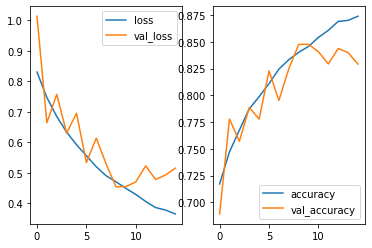

In [7]:
plt.subplot(1,2,1)
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

plt.show()

In [8]:
p_test = model.predict(x_test).argmax(axis=1)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, p_test)

array([[834,  12,  24,  45,   9,   1,  10,   0,  52,  13],
       [  4, 962,   2,   4,   0,   0,   2,   0,  14,  12],
       [ 42,   1, 686,  93,  34,  43,  87,   8,   5,   1],
       [  9,   2,  17, 838,  21,  60,  45,   1,   4,   3],
       [  2,   1,  19,  81, 782,  12,  94,   6,   2,   1],
       [  3,   2,  12, 220,  21, 698,  31,  10,   1,   2],
       [  2,   1,  11,  53,   3,   3, 926,   0,   1,   0],
       [  9,   1,  15,  69,  64,  46,  14, 771,   6,   5],
       [ 22,  10,   2,  22,   3,   0,   7,   0, 913,  21],
       [ 14,  66,   0,  18,   1,   3,   5,   1,   9, 883]])

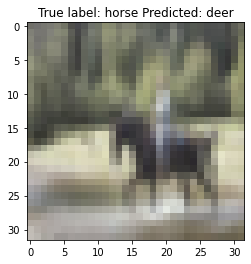

In [10]:
# label mapping
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 